In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 57.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-

100%|██████████| 253M/253M [00:23<00:00, 11.3MB/s]

2024-04-29 16:36:28,673 copying /tmp/tmp6l3fnsm4 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-04-29 16:36:29,294 removing temp file /tmp/tmp6l3fnsm4


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction import text
import string

In [ ]:
modi = pd.read_csv("/content/drive/MyDrive/Election Prediction/dataset/modi_reviews.csv")
modi.head()

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,TheNirbhay1,PM Modi creates a new record of being the only...
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...


In [ ]:
np.random.seed(10)
remove_n = 16688
drop_indices = np.random.choice(modi.index, remove_n, replace=False)
df_modi = modi.drop(drop_indices)
df_modi.shape

(9000, 3)

In [ ]:
df_modi

,Unnamed: 0,User,Tweet
1,1,jiaeur,LokSabhaElections2019 23rd May 2019 reveal Eve...
2,2,PVenkatGandhi,LokSabhaElections2019 23rd May 2019 reveal Eve...
4,4,ShakeChilli,abhijitmajumder Appointment Successor God forb...
6,6,Mdsr20351488,After 5yrs Modi 🙁 SC vs SC EC vs EC Media vs M...
10,10,sheikh541,BJP renamed Safroon Party named Modi Party bod...
...,...,...,...
25669,25669,CrazySatire,It Modi planted person congress’ script writer...
25670,25670,iScrew,This LokSabhaElections2019 reduced ugly charac...
25676,25676,SunjayJK,IASassociation MTWe stand IPSAssociation colle...
25683,25683,shv_indian,1DDrive ModiSpeaksToNews18 LokSabhaElections20...


In [ ]:
rahul = pd.read_csv("/content/drive/MyDrive/Election Prediction/dataset/rahul_reviews.csv")
rahul.head()

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...


In [ ]:
rahul.shape

(14261, 3)

In [ ]:
np.random.seed(10)
remove_n = 5261
drop_indices = np.random.choice(rahul.index, remove_n, replace=False)
df_rahul = rahul.drop(drop_indices)
df_rahul.shape

(9000, 3)

In [ ]:
# Remove stopwords
stop = text.ENGLISH_STOP_WORDS
df_modi['Tweet'] = df_modi['Tweet'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop]))
df_rahul['Tweet'] = df_rahul['Tweet'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop]))

# Remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df_modi['Tweet'] = df_modi['Tweet'].apply(remove_punctuations)
df_rahul['Tweet'] = df_rahul['Tweet'].apply(remove_punctuations)

In [ ]:
df_modi

,Unnamed: 0,User,Tweet
1,1,jiaeur,LokSabhaElections2019 23rd May 2019 reveal Eve...
2,2,PVenkatGandhi,LokSabhaElections2019 23rd May 2019 reveal Eve...
4,4,ShakeChilli,abhijitmajumder Appointment Successor God forb...
6,6,Mdsr20351488,After 5yrs Modi 🙁 SC vs SC EC vs EC Media vs M...
10,10,sheikh541,BJP renamed Safroon Party named Modi Party bod...
...,...,...,...
25669,25669,CrazySatire,It Modi planted person congress’ script writer...
25670,25670,iScrew,This LokSabhaElections2019 reduced ugly charac...
25676,25676,SunjayJK,IASassociation MTWe stand IPSAssociation colle...
25683,25683,shv_indian,1DDrive ModiSpeaksToNews18 LokSabhaElections20...


In [ ]:
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"

In [ ]:
# Applying flair on both the dataframes
df_modi['Emotion']=df_modi['Tweet'].apply(flair_prediction)
df_rahul['Emotion']=df_rahul['Tweet'].apply(flair_prediction)

In [ ]:
rahul.head()

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...


In [ ]:
modi.head()

,Unnamed: 0,User,Tweet
0,0,advosushildixit,anjanaomkashyap I seeing future bjp spokespers...
1,1,jiaeur,LokSabhaElections2019 23rd May 2019 reveal Ev...
2,2,PVenkatGandhi,LokSabhaElections2019 23rd May 2019 reveal Ev...
3,3,TheNirbhay1,PM Modi creates new record PM democratic count...
4,4,ShakeChilli,abhijitmajumder Appointment Successor God forb...


<ipython-input-28-392520a287b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_modi['Emotion'],palette=['#36454F','#89CFF0'])


Text(0.5, 1.0, 'Sentiments scores of Tweets about Modi')

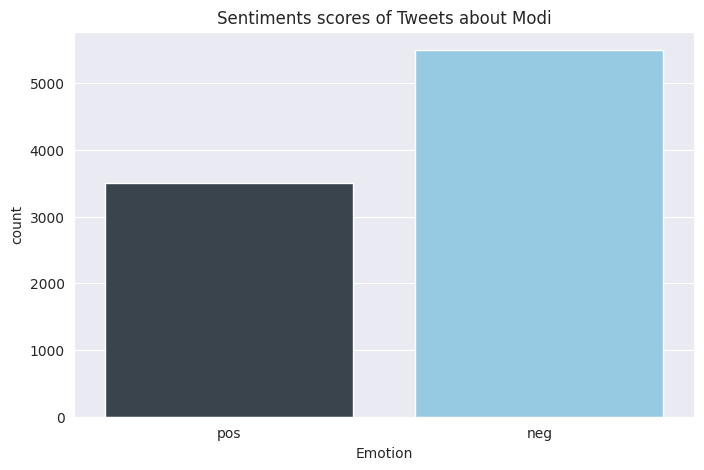

In [ ]:
# Sentiments for Narendra Modi
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
ax = sns.countplot(x=df_modi['Emotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')

<ipython-input-27-63fc17d928f9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_rahul['Emotion'],palette=['#89CFF0','#36454F'])


Text(0.5, 1.0, 'Sentiments scores of Tweets about Rahul Gandhi')

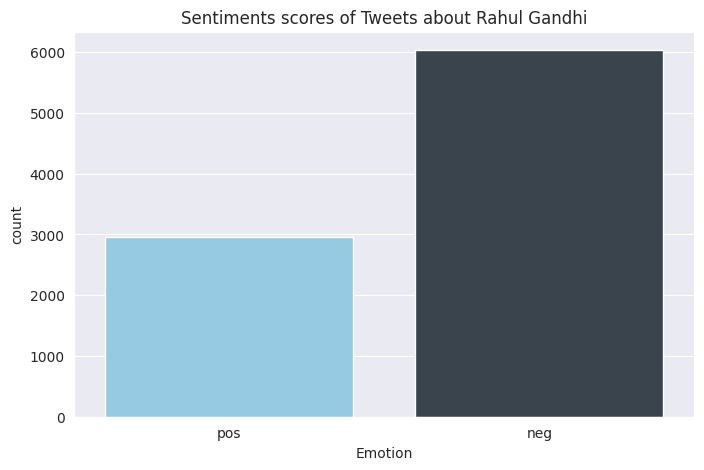

In [ ]:
# Sentiments for Rahul Gandhi
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
ax = sns.countplot(x=df_rahul['Emotion'],palette=['#89CFF0','#36454F'])
ax.set_title('Sentiments scores of Tweets about Rahul Gandhi')